In [1]:
%matplotlib inline

import cosima_cookbook as cc
import matplotlib.pyplot as plt
import numpy as np
import netCDF4 as nc
import xarray as xr
import cmocean as cm
import pandas as pd

import logging
logging.captureWarnings(True)
logging.getLogger('py.warnings').setLevel(logging.ERROR)

from dask.distributed import Client

In [6]:
db = '/g/data3/hh5/tmp/cosima/database/access-om2.db'

In [3]:
## To implement, use:
## dask-scheduler
## dask-worker tcp://10.0.64.4:8786 --memory-limit 4e9 --nprocs 6 --nthreads 1 --local-directory /local/g40/amh157
# client=Client('tcp://10.0.64.22:8786', local_dir='/local/g40/amh157')
client = Client(n_workers=4)
client

Client Scheduler: tcp://127.0.0.1:41606 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 4 Cores: 8 Memory: 33.67 GB


In [5]:
def global_scalar(variable, db):
    #expt = 'access-om2-01/01deg_jra55v13_ryf8485_spinup6'
    #darray = cc.querying.getvar(expt, variable, db, ncfile='ocean_scalar.nc',
    #                            offset=693135, time_units='days since 1900-01-01',n=350)
    #annual_average = darray.resample(time='3M').mean()
    #annual_average.plot(label='spinup6')
    
    expt = '01deg_jra55v13_ryf8485_spinup7'
    darray = cc.querying.getvar(expt, variable, db)
    annual_average = darray.resample(time='3M').mean()
    annual_average.plot(label='spinup7')
    
    
    expt = '01deg_jra55v13_ryf8485_spinup9'
    darray = cc.querying.getvar(expt, variable, db)
    annual_average = darray.resample(time='3M').mean()
    annual_average.plot(label='spinup9')
    
    expt = '01deg_jra55v13_ryf8485_spinup10'
    darray = cc.querying.getvar(expt, variable, db)
    annual_average = darray.resample(time='3M').mean()
    annual_average.plot(label='spinup10')
    
    expt = '01deg_jra55v13_ryf8485_spinup11'
    darray = cc.querying.getvar(expt, variable, db)
    annual_average = darray.resample(time='3M').mean()
    annual_average.plot(label='spinup11')
    
    plt.title(variable)

    #plt.gca().autoscale()

CPU times: user 22.1 s, sys: 2.31 s, total: 24.4 s
Wall time: 35.8 s


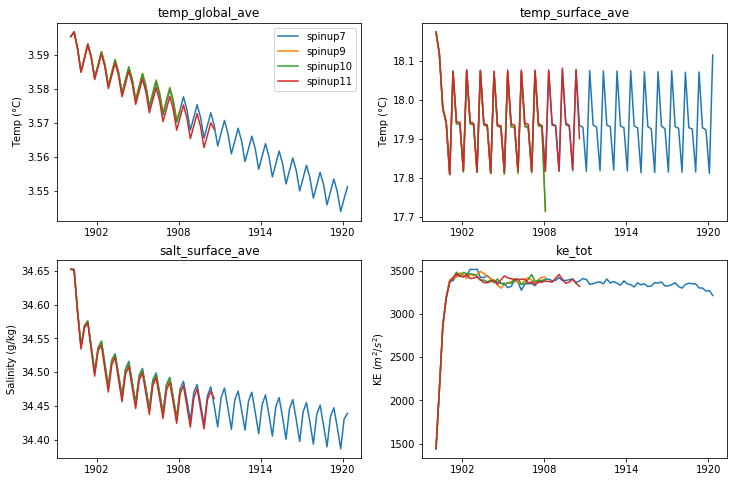

In [6]:
%%time
plt.figure(figsize=(12,8))

#############
## FIRST PLOT
ax = plt.subplot(221)
global_scalar('temp_global_ave', db)
plt.legend()
plt.xlabel('')
plt.ylabel('Temp (°C)')
#ax.set_xlim([pd.datetime(1900,1,1),pd.datetime(1919,12,31)])

##############
## SECOND PLOT
ax = plt.subplot(222)
global_scalar('temp_surface_ave', db)
plt.xlabel('')
plt.ylabel('Temp (°C)')
#ax.set_xlim([pd.datetime(1900,1,1),pd.datetime(1919,12,31)])

#############
## THIRD PLOT
ax = plt.subplot(223)
global_scalar('salt_surface_ave', db)
plt.xlabel('')
plt.ylabel('Salinity (g/kg)')
#ax.set_xlim([pd.datetime(1900,1,1),pd.datetime(1919,12,31)])

#############
##FOURTH PLOT
ax = plt.subplot(224)
global_scalar('ke_tot', db)
plt.xlabel('')
plt.ylabel('KE ($m^2/s^2$)')
#ax.set_xlim([pd.datetime(1900,1,1),pd.datetime(1919,12,31)])

In [19]:
help(cc.querying.getvar)

Help on function getvar in module cosima_cookbook.querying:

getvar(expt, variable, db, ncfile=None, n=None, start_time=None, end_time=None, chunks=None, time_units=None, offset=None, decode_times=True, check_present=False)
    For a given experiment, return an xarray DataArray containing the
    specified variable.
    
    If disambiguation based on filename is required, pass the ncfile
    argument.
    A subset of output data can be obtained by either
    restricting the number of results (use a negative value of n to
    get the latest n files), or by the time ranges spanned by the
    file.
    Override any chunking by passing a chunks dictionary.
    A time offset in days can also be applied.
    Time decoding can be disabled by passing decode_times=False



In [8]:
variable = 'temp_global_ave'
expt = 'access-om2-01/01deg_jra55v13_ryf8485_spinup6'
darray = cc.querying.getvar(expt, variable, db)
#annual_average = darray.resample(time='3M').mean()
#annual_average.plot(label='spinup6')

IndexError: list index out of range

Exception during reset or similar
Traceback (most recent call last):
  File "/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.04/lib/python3.6/site-packages/psutil/_common.py", line 342, in wrapper
    ret = self._cache[fun]
AttributeError: 'Process' object has no attribute '_cache'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.04/lib/python3.6/site-packages/sqlalchemy/pool/base.py", line 680, in _finalize_fairy
    fairy._reset(pool)
  File "/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.04/lib/python3.6/site-packages/sqlalchemy/pool/base.py", line 867, in _reset
    pool._dialect.do_rollback(self)
  File "/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.04/lib/python3.6/site-packages/sqlalchemy/engine/default.py", line 500, in do_rollback
    dbapi_connection.rollback()
sqlite3.ProgrammingError: SQLite objects created in a thread can only be used i

Exception during reset or similar
Traceback (most recent call last):
  File "/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.04/lib/python3.6/site-packages/tornado/gen.py", line 1147, in run
    yielded = self.gen.send(value)
  File "/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.04/lib/python3.6/site-packages/distributed/comm/utils.py", line 58, in to_frames
    raise gen.Return(res)
tornado.gen.Return: [b'', b'\x82\xa2op\xa8identity\xa5reply\xc3']

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.04/lib/python3.6/site-packages/sqlalchemy/pool/base.py", line 680, in _finalize_fairy
    fairy._reset(pool)
  File "/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.04/lib/python3.6/site-packages/sqlalchemy/pool/base.py", line 867, in _reset
    pool._dialect.do_rollback(self)
  File "/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.04/lib/python3.6/sit

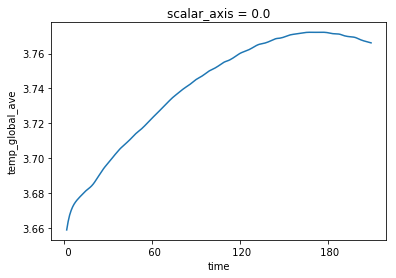

In [9]:
expt = '1deg_jra55_ryf8485_spinup2'
variable='temp_global_ave'
darray = cc.querying.getvar(expt, variable, db)
annual_average = darray.resample(time='A').mean('time')
annual_average.plot(label='spinup2')
    